#1 O CONTEXTO:

 - QUEM é público que queremos transmitir a análise?
    - Seja o mais específico possível
      - 

 - O QUE vamos transmitir nessa análise?
    - Eu quero que meu leitor faça ou saiba a respeito com essas informações
    
 - COMO vamos transmitir essa mensagem ppt ou ipynb ?
   - Iremos transmitir em PPT

 - O storyboard

In [169]:
# Definições de cores -> todas estão numa escala de mais escura para mais clara
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

## Libs

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
filepath = r'data_science_salaries.csv'
df = pd.read_csv(filepath)
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [24]:
df.drop(columns=['salary', 'salary_currency'], inplace=True)
df.head(10)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,United States,Medium
5,BI Developer,Mid-level,Full-time,On-site,2024,United States,62100,United States,Medium
6,Research Analyst,Entry-level,Full-time,On-site,2024,United States,250000,United States,Medium
7,Research Analyst,Entry-level,Full-time,On-site,2024,United States,150000,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,United States,Medium
9,Data Engineer,Executive-level,Full-time,Remote,2024,United States,136000,United States,Medium


In [49]:
salario_medio_por_ano = df.groupby(['experience_level', 'work_year'])['salary_in_usd'].mean().reset_index()
salario_medio_por_ano

,experience_level,work_year,salary_in_usd
0,Entry-level,2020,69840.666667
1,Entry-level,2021,63463.065217
2,Entry-level,2022,72822.705882
3,Entry-level,2023,90706.196532
4,Entry-level,2024,90308.460000
5,Executive-level,2020,179958.250000
6,Executive-level,2021,186128.000000
7,Executive-level,2022,183837.743590
8,Executive-level,2023,191130.081522
9,Executive-level,2024,191874.470588


In [50]:
salario_medio_por_ano['salary_in_usd'] = salario_medio_por_ano['salary_in_usd'].apply(lambda x: round(x, 2))
salario_medio_por_ano

,experience_level,work_year,salary_in_usd
0,Entry-level,2020,69840.67
1,Entry-level,2021,63463.07
2,Entry-level,2022,72822.71
3,Entry-level,2023,90706.20
4,Entry-level,2024,90308.46
5,Executive-level,2020,179958.25
6,Executive-level,2021,186128.00
7,Executive-level,2022,183837.74
8,Executive-level,2023,191130.08
9,Executive-level,2024,191874.47


In [133]:
cargos

array(['Entry-level', 'Executive-level', 'Mid-level', 'Senior-level'],
      dtype=object)

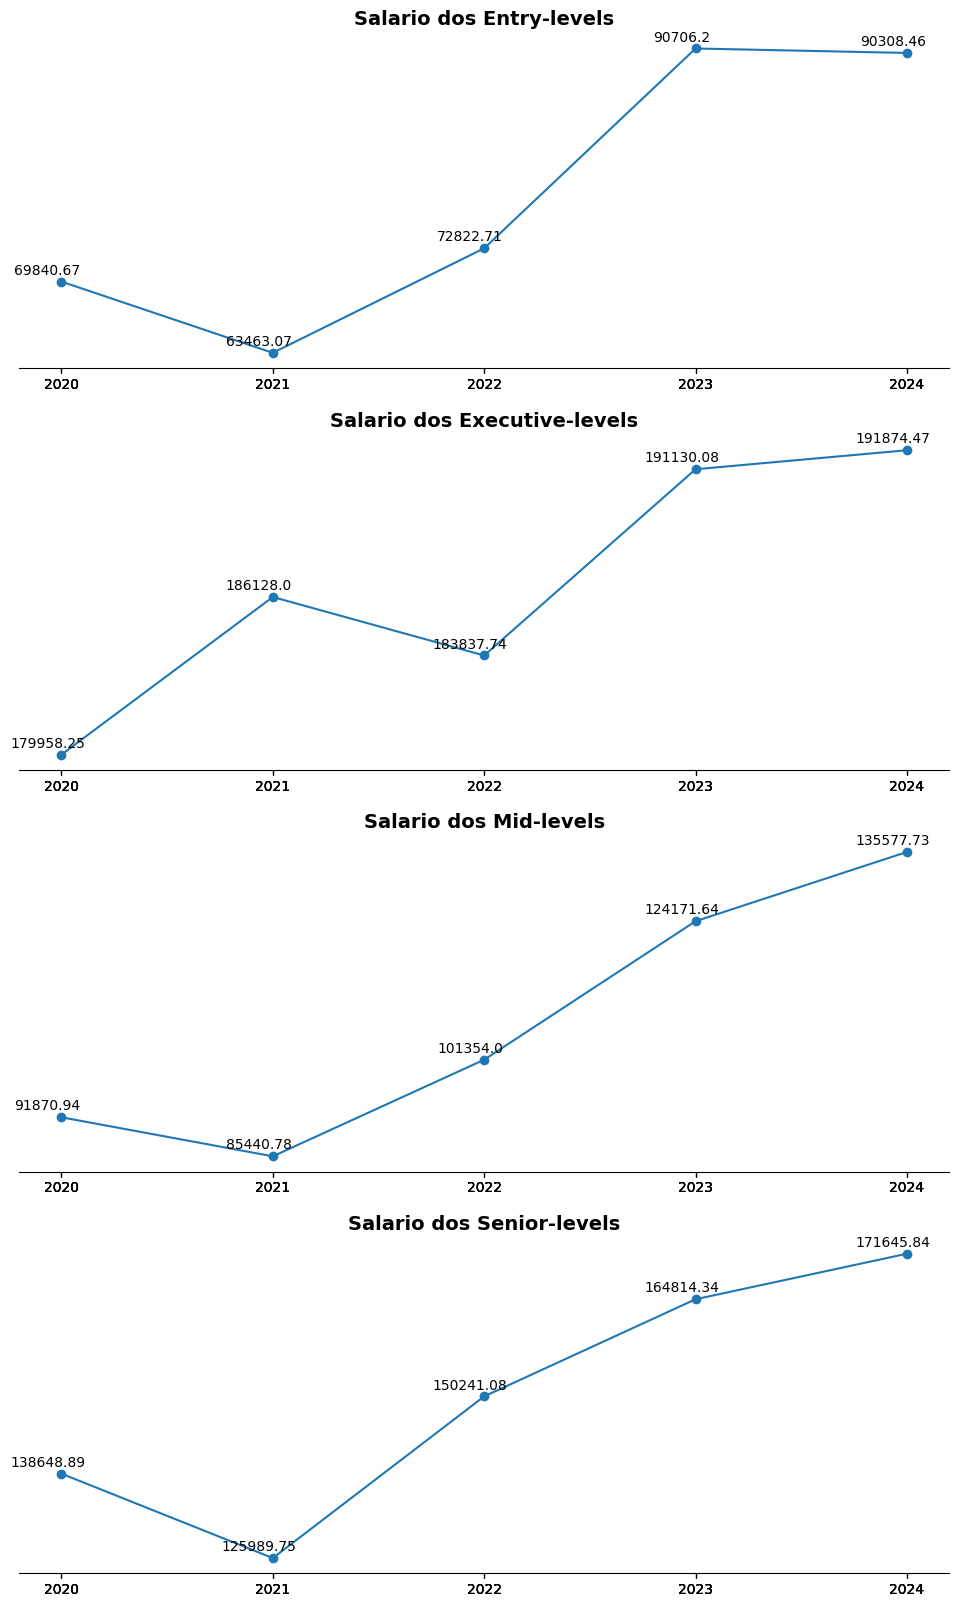

In [151]:
cargos = salario_medio_por_ano['experience_level'].unique()

fig, ax = plt.subplots(figsize=(12,20), nrows=4, ncols=1)

for i, cargo in enumerate(cargos):
    ax[i].plot(salario_medio_por_ano[salario_medio_por_ano['experience_level'] == cargo]['work_year'],
               salario_medio_por_ano[salario_medio_por_ano['experience_level'] == cargo]['salary_in_usd'],
               marker= 'o')
    
    for x, y in zip(salario_medio_por_ano[salario_medio_por_ano['experience_level'] == cargo]['work_year'], 
                    salario_medio_por_ano[salario_medio_por_ano['experience_level'] == cargo]['salary_in_usd']):
        ax[i].annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10,5), ha='center')
    
    

    ax[i].set_title(f'Salario dos {cargo}s', fontsize=14, fontweight='bold')
    ax[i].set_yticks([])
    ax[i].set_xticks(salario_medio_por_ano['work_year'])
    ax[i].spines[['right', 'top', 'left']].set_visible(False)


plt.show()

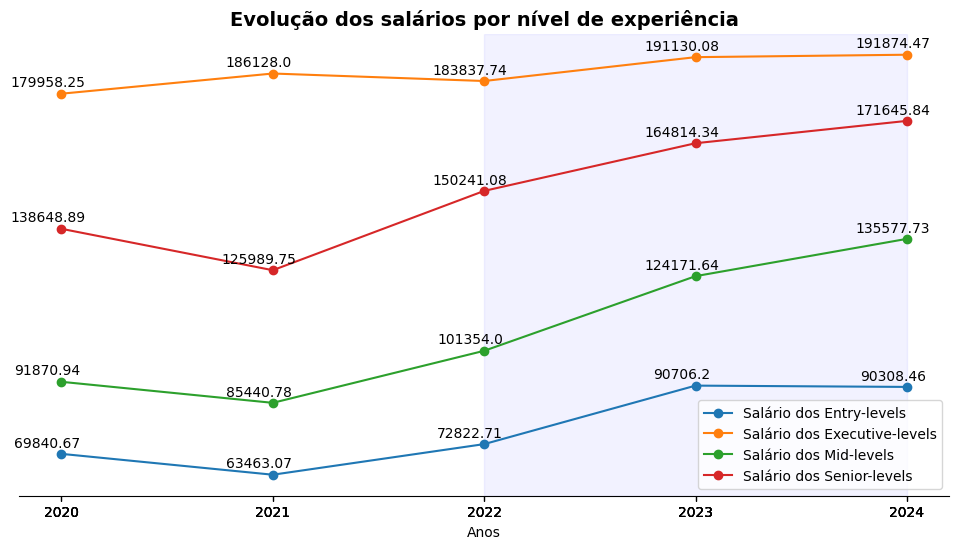

In [168]:
cargos = salario_medio_por_ano['experience_level'].unique()

fig, ax = plt.subplots(figsize=(12, 6))

for cargo in cargos:
    ax.plot(salario_medio_por_ano[salario_medio_por_ano['experience_level'] == cargo]['work_year'],
            salario_medio_por_ano[salario_medio_por_ano['experience_level']
                                  == cargo]['salary_in_usd'],
            marker='o', label=f'Salário dos {cargo}s')

    for x, y in zip(salario_medio_por_ano[salario_medio_por_ano['experience_level'] == cargo]['work_year'],
                    salario_medio_por_ano[salario_medio_por_ano['experience_level'] == cargo]['salary_in_usd']):
        ax.annotate(f'{y}', (x, y), textcoords="offset points",
                    xytext=(-10, 5), ha='center')

ax.set_title('Evolução dos salários por nível de experiência',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Anos')
ax.set_xticks(salario_medio_por_ano['work_year'])
ax.set_yticks([])
ax.legend()
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.axvspan(2022, 2024, color='blue', alpha= 0.05)

plt.show()

Text(1.2, 750000, 'Valor máximo 750000')

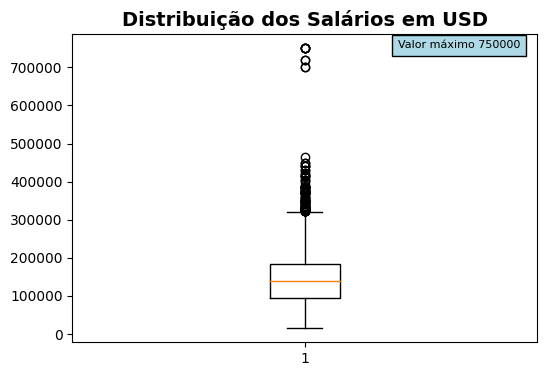

In [28]:
fig, ax = plt.subplots(figsize= (6, 4))

ax.boxplot(x= df['salary_in_usd'])
ax.set_title('Distribuição dos Salários em USD',
             fontsize= 14,
             fontweight= 'bold')

ax.annotate(f'Valor máximo {max_salary}',
            xy=  (1, max_salary),
            xytext= (1.2, max_salary),
            fontsize = 8,
            bbox=dict(facecolor= 'lightblue', edgecolor= 'black')
            )


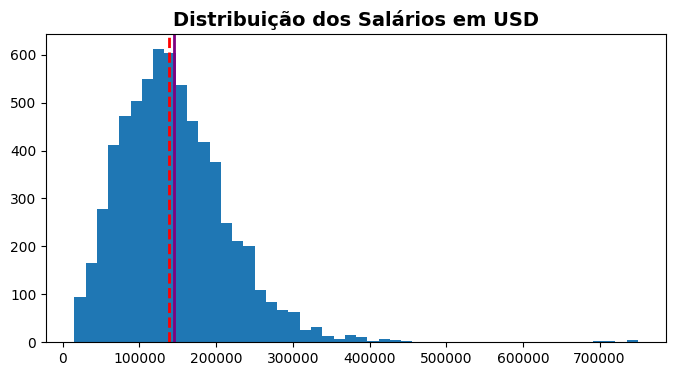

In [29]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.hist(x=df['salary_in_usd'], bins=50)
ax.set_title('Distribuição dos Salários em USD',
             fontsize=14,
             fontweight='bold')

ax.axvline(median_salary, color= 'red', linestyle='dashed', linewidth = 2)
ax.axvline(mean_salary, color= 'purple',  linewidth = 2)


In [30]:
df['job_title'].value_counts()

Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Analytics Engineer            246
                             ... 
Deep Learning Researcher        1
Power BI Developer              1
Marketing Data Scientist        1
AI Product Manager              1
Sales Data Analyst              1
Name: job_title, Length: 132, dtype: int64

In [31]:
# Cargos relacionados com analise de dados
dados_analista = ['Data Analyst', 'Research Analyst', 'Business Data Analyst', 'Financial Data Analyst', 'Compliance Data Analyst',
                  'Product Data Analyst', 'Finance Data Analyst', 'Insight Analyst', 'Marketing Data Analyst', 'Sales Data Analyst',
                  'Data Analytics Specialist', 'Data Quality Analyst', 'Data Strategy Manager', 'Data Operations Analyst',
                  'Decision Scientist', 'Data Visualization Specialist', 'Data Visualization Engineer', 'Data Visualization Analyst',
                  'Principal Data Analyst', 'Staff Data Analyst', 'Data Analyst Lead', 'Lead Data Analyst', 'Data Analytics Manager',
                  'Data Analytics Consultant', 'Data Analytics Lead', 'Data Strategist']

# Cargos relacionados com ciencia de dados
dados_cientistas = ['Data Scientist', 'Director of Data Science', 'Data Science Manager', 'Applied Scientist',
                    'Research Scientist', 'Managing Director Data Science', 'Data Science Practitioner',
                    'Data Science Consultant', 'Data Science Engineer', 'Data Science Lead', 'Data Science Director',
                    'Head of Data', 'Principal Data Scientist', 'Head of Data Science', 'Marketing Data Scientist',
                    'Data Scientist Lead', 'Staff Data Scientist', 'Applied Data Scientist', 'Lead Data Scientist', 'Data Science Tech Lead',
                    'Data Science', 'Analytics Engineering Manager']
# Cargos relacionados com engenharia de dados
eng_dados = ['Data Quality Engineer', 'Data Engineer', 'Analytics Engineer', 'Data Architect', 'ETL Developer', 'Data Lead', 'Data Developer',
             'Data Modeler', 'Data Integration Engineer', 'Data Management Analyst', 'Data Integration Specialist',
             'Data Management Specialist', 'Data Infrastructure Engineer', 'Software Data Engineer', 'Data Operations Engineer',
             'Cloud Database Engineer', 'Big Data Engineer', 'Azure Data Engineer', 'Lead Data Engineer', 'Data DevOps Engineer',
             'Principal Data Engineer', 'Consultant Data Engineer', 'Data Engineer Lead', 'Cloud Data Engineer',
             'AWS Data Architect', 'Cloud Data Architect', 'Marketing Data Engineer', 'Data Modeller', 'Analytics Engineer Manager', 'ETL Engineer',
             'Data Analyst Engineer', 'Data Quality Manager', 'Data Manager', 'Data Operations Manager', 'Principal Data Architect', 'Big Data Architect',
             'Data Analytics Engineer', 'Data Operations Specialist']

# Cargos relacionados com Machine Learning!
ml = ['Machine Learning Engineer', 'MLOps Engineer', 'Machine Learning Scientist', 'ML Engineer',
      'AI Engineer', 'Machine Learning Infrastructure Engineer', 'Machine Learning Operations Engineer', 'NLP Engineer',
      'Machine Learning Researcher', 'Machine Learning Modeler', 'Machine Learning Software Engineer', 'Head of Machine Learning',
      'Machine Learning Manager', 'AI Research Engineer', 'Deep Learning Engineer', 'Applied Machine Learning Engineer',
      'Machine Learning Research Engineer', 'Principal Machine Learning Engineer', 'Lead Machine Learning Engineer',
      'Machine Learning Specialist', 'Machine Learning Developer', 'Deep Learning Researcher', 'Principal Machine Learning Engineer',
      'Staff Machine Learning Engineer', 'AI Architect', 'Prompt Engineer', 'Computer Vision Engineer', 'AI Developer', 'AI Scientist', 'AI Product Manager',
      'AI Programmer', 'Applied Machine Learning Scientist', 'Autonomous Vehicle Technician', 'Computer Vision Software Engineer']

# Cargos Relacionados com Business Intelligence!
bi = ['BI Developer', 'Business Intelligence Developer', 'Business Intelligence Analyst',
      'Business Intelligence Engineer', 'BI Analyst', 'Business Intelligence Specialist',
      'BI Data Analyst', 'Business Intelligence Data Analyst', 'Power BI Developer', 'Business Intelligence Manager', 'BI Data Engineer', 'Manager Data Management', 'Data Product Manager',
      'Data Product Owner']

In [32]:
def reclassify_job_title(title):
    if title in dados_cientistas:
        return 'Data Scientist'
    elif title in dados_analista:
        return 'Data Analytics'
    elif title in eng_dados:
        return 'Data Engineer'
    elif title in ml:
        return 'Machine Learning'
    elif title in bi:
        return 'Business Intelligence'
    else:
        return title


df['job_category'] = df['job_title'].apply(reclassify_job_title)